$$\require{mhchem}$$       

# Non-isothermal batch reactor design

The exothermic elementary liquid phase reaction
\begin{align}
\ce{A + B <->[k,K] C + D}\\
\end{align}
is carried out in a batch reactor with a cooling coil to keep the reactor isothermal at 40 C. The reactor is initially charged with equal concentrations of A and B and no C or D, $C_{A0}=C_{B0}=2$mol/L.  

$k=0.1$ L/mol/min at 40 C, $K=2$ at 40 C

$\Delta H_R=-20$ kcal/mol A at 40 C

Partial molar heat capacities $C_{pA}=C_{pB}=C_{pC}=C_{pD}=20$cal/mol/K

Activation energy for the reaction $E_a=1000 cal/mol/K$. 

Reactor volume 1200 L

#### How long does it take to reach 50% conversion? Also show a plot of concentration of all species vs time.

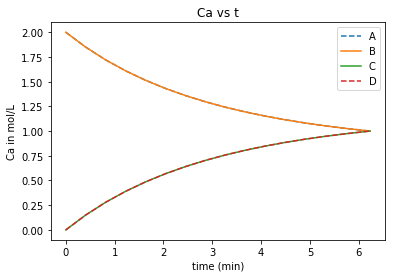

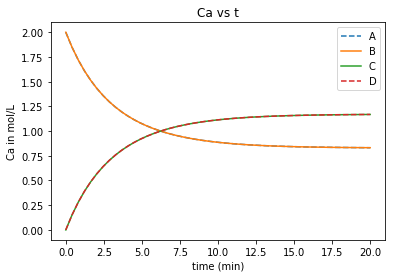

Time required to achieve 50% conversion is 6.23225766159 mins


In [1]:
import numpy as np
from pycse import odelay
from scipy.integrate import odeint

#Constants defined:

R = 1.9858  #cal.mol-1.K-1
T0 = 40+273 #K
K0 = 2
kf0 = 0.1 #L.mol-1.min-1
dHrxn0 = -20000 #cal.mol-1
cpa = cpb = cpc = cpd = 20 #cal.mol-1.K-1
cp = [cpa,cpb,cpc,cpd]
Ea = 1000 #cal.mol-1.K-1
V = 1200 #L
alpha = [-1,-1,1,1]

#Reactor initial and inlet conditions:
Ca0 = 2 #mol/L
Cb0 = 2 #mol/L
Cc0 = 0 #mol/L
Cd0 = 0 #mol/L
C0 = [Ca0,Cb0,Cc0,Cd0]



def nonisothermal_batch(C,t):
    Ca,Cb,Cc,Cd = C #unpacking variables
    
    #dcp = np.dot(cp,alpha) #deltacp = sigma alphai.cpi
    dHrxn = dHrxn0 #+ dcp*(T-T0) #delta H reaction as a function of temperature
    K = K0  #*np.exp(-dHrxn/R*(1/T - 1/T0)) #K at given temperature
    kf = kf0 #*np.exp(-Ea/R*(1/T-1/T0)) #k at given temperature
    kb = kf/K
    
    rfwd = kf*Ca*Cb #rate of forward reaction
    rbck = kb*Cc*Cd #rate of backward reaction
    
    ra = dnadt= - rfwd + rbck  #individual rates
    rb = dnbdt= - rfwd + rbck
    rc = dncdt= rfwd - rbck
    rd = dnddt= rfwd - rbck
    
    
    """Ca = Ca0 + ra/V  #mole balance
    Cb = Cb0 + rb/V
    Cc = Cc0 + rc/V
    Cd = Cd0 + rd/V
    Conc = [Ca,Cb,Cc,Cd]"""
    
    #x =  (Ca0-Ca)/Ca0 #conversion
    #Q = 0
    #(-dHrxn*rc*V + Q)/(V*np.dot(Conc,cp)) #Energy balance
    
    out = [dnadt,dnbdt,dncdt,dnddt]
    return out

def event1(C, t):
    Ca,Cb,Cc,Cd= C #unpacking variables
    value = (Ca)/Ca0 - (0.5)
    isterminal = True
    direction  = 0
    return value, isterminal, direction


xspan = np.linspace(0,20)
sol = odeint(nonisothermal_batch, C0, xspan)
X, Y, XE, YE, IE = odelay(nonisothermal_batch, C0, xspan, events=[event1])
import matplotlib.pyplot as plt
#print(Y)
plt.plot(X,Y[:,0],'--',X,Y[:,1],X,Y[:,2],X,Y[:,3],'--')
plt.xlabel("time (min)")
plt.ylabel("Ca in mol/L")
plt.legend(['A','B','C','D'])
plt.title("Ca vs t")
plt.show()

plt.plot(xspan,sol[:,0],'--',xspan,sol[:,1],xspan,sol[:,2],xspan,sol[:,3],'--')
plt.xlabel("time (min)")
plt.ylabel("Ca in mol/L")
plt.legend(['A','B','C','D'])
plt.title("Ca vs t")
plt.show()
print("Time required to achieve 50% conversion is",X[-1],"mins")

#### What is the total amount of heat (kcal) that must be removed by the cooling coil when the conversion is reached?

In [2]:
import numpy as np
from pycse import odelay
from scipy.integrate import odeint

#Constants defined:

R = 1.9858  #cal.mol-1.K-1
T0 = 40+273 #K
K0 = 2
kf0 = 0.1 #L.mol-1.min-1
dHrxn0 = -20000 #cal.mol-1
cpa = cpb = cpc = cpd = 20 #cal.mol-1.K-1
cp = [cpa,cpb,cpc,cpd]
Ea = 1000 #cal.mol-1.K-1
V = 1200 #L
alpha = [-1,-1,1,1]
Q0 = 0
#Reactor initial and inlet conditions:
Ca0 = 2 #mol/L
Cb0 = 2 #mol/L
Cc0 = 0 #mol/L
Cd0 = 0 #mol/L
C0 = [Ca0,Cb0,Cc0,Cd0,Q0]



def nonisothermal_batch(C,t):
    Ca,Cb,Cc,Cd,Q = C #unpacking variables
    
    #dcp = np.dot(cp,alpha) #deltacp = sigma alphai.cpi
    dHrxn = dHrxn0 #+ dcp*(T-T0) #delta H reaction as a function of temperature
    K = K0 #*np.exp(-dHrxn/R*(1/T - 1/T0)) #K at given temperature
    kf = kf0  #*np.exp(-Ea/R*(1/T-1/T0)) #k at given temperature
    kb = kf/K
    
    rfwd = kf*Ca*Cb #rate of forward reaction
    rbck = kb*Cc*Cd #rate of backward reaction
    
    ra = dnadt= - rfwd + rbck  #individual rates
    rb = dnbdt= - rfwd + rbck
    rc = dncdt= rfwd - rbck
    rd = dnddt= rfwd - rbck
    
    
    """Ca = Ca0 + ra/V  #mole balance
    Cb = Cb0 + rb/V
    Cc = Cc0 + rc/V
    Cd = Cd0 + rd/V
    Conc = [Ca,Cb,Cc,Cd]"""
    
    #x =  (Ca0-Ca)/Ca0 #conversion
    #Q = 0
    #(-dHrxn*rc*V + Q)/(V*np.dot(Conc,cp)) #Energy balance
    Q = dHrxn*rc*V 
    out = [dnadt,dnbdt,dncdt,dnddt,Q]
    return out

def event1(C, t):
    Ca,Cb,Cc,Cd,Q= C #unpacking variables
    value = (Ca)/Ca0 - (0.5)
    isterminal = True
    direction  = 0
    return value, isterminal, direction


xspan = np.linspace(0,20)
sol = odeint(nonisothermal_batch, C0, xspan)
X, Y, XE, YE, IE = odelay(nonisothermal_batch, C0, xspan, events=[event1])

print("Heat removed to achieve 50% conversion is {0:1.4f} ".format(abs(Y[-1,4])/1000),"kCal")

Heat removed to achieve 50% conversion is 24000.0000  kCal


#### What is the maximum rate at which heat must be removed by the cooling coil, and at what time does this occur?

In [3]:
print("We will get max cooling rate for Q = dHrxn*rc*V when rc is max because dHrxn and V are constant\n")
dHrxn = -20000

Qmax = dHrxn*kf0*Ca0*Cb0*V/1000
print("The max rae of heat removal occurs when Ca and Cb are at maximum values and that occurs when t=0.\n The value of max cooling rate is ",abs(Qmax),"KCal/min\n")

We will get max cooling rate for Q = dHrxn*rc*V when rc is max because dHrxn and V are constant

The max rae of heat removal occurs when Ca and Cb are at maximum values and that occurs when t=0.
 The value of max cooling rate is  9600.0 KCal/min



#### Now consider a non-isothermal version of this reactor.  There is a cooling bath around the reactor with a total heat transfer coefficient $Ua=300$ kcal/L/min. The reactor starts at 40 C  What is the maximum temperature $T_0$ that you can keep the cooling bath such that the temperature in the batch reactor rises no higher than 60C?



In [4]:
import numpy as np
from pycse import odelay
from scipy.integrate import odeint
from scipy.optimize import fsolve

#Constants defined:

R = 1.9858  #cal.mol-1.K-1
T0 = 40+273 #K
K0 = 2
kf0 = 0.1 #L.mol-1.min-1
dHrxn0 = -20000 #cal.mol-1
cpa = cpb = cpc = cpd = 20 #cal.mol-1.K-1
cp = [cpa,cpb,cpc,cpd]
Ea = 1000 #cal.mol-1.K-1
V = 1200 #L
alpha = [-1,-1,1,1]
Ua = 300000 #cal/L/min


#Reactor initial and inlet conditions:
Ca0 = 2 #mol/L
Cb0 = 2 #mol/L
Cc0 = 0 #mol/L
Cd0 = 0 #mol/L
C0 = [Ca0,Cb0,Cc0,Cd0,T0]
Tmax = 273+60

def nonisothermal_batch(C,t,Tcool):
    Ca,Cb,Cc,Cd,T = C #unpacking variables


    dcp = np.dot(cp,alpha) #deltacp = sigma alphai.cpi
    dHrxn = dHrxn0 + dcp*(T-T0) #delta H reaction as a function of temperature
    K = K0*np.exp(-dHrxn/R*(1/T - 1/T0)) #K at given temperature
    kf = kf0*np.exp(-Ea/R*(1/T-1/T0)) #k at given temperature
    kb = kf/K

    rfwd = kf*Ca*Cb #rate of forward reaction
    rbck = kb*Cc*Cd #rate of backward reaction

    ra = dnadt= - rfwd + rbck  #individual rates
    rb = dnbdt= - rfwd + rbck
    rc = dncdt= rfwd - rbck
    rd = dnddt= rfwd - rbck


    """Ca = Ca0 + ra/V  #mole balance
    Cb = Cb0 + rb/V
    Cc = Cc0 + rc/V
    Cd = Cd0 + rd/V"""
    Conc = [Ca,Cb,Cc,Cd]

    x =  (Ca0-Ca)/Ca0 #conversion
    Q = Ua*(Tcool-T)
    dTdt = (-dHrxn*rc*V + Q)/(V*np.dot(Conc,cp)) #Energy balance


    out = [dnadt,dnbdt,dncdt,dnddt,dTdt]
    return out


def func(Tcool):
    xspan = np.linspace(0,100,500)
    sol = odeint(nonisothermal_batch, C0, xspan,args=(Tcool,))
    tmax = max(sol[:,4])
    res = Tmax - tmax
    return res

a = fsolve(func,400)
print("The max temperature of coolant is ",a[0],"Kelvin")

    

The max temperature of coolant is  307.634771162 Kelvin


# CSTR with internal mass transfer and heat drops

You have a isomerization catalytic reactor with the following kinetics:
\begin{align*}
\ce{A + S <->[K_A] AS}\\
\ce{AS ->[k] BS}\\
\ce{BS -> B + S}
\end{align*}
The surface step is limiting and you derive the following rate law:
\begin{align*}
r= k \overline{c}_m \frac{K_A c_A}{1 + K_A c_A}
\end{align*}
The reactor is a 500 L CSTR with 5 kg of catalyst particles.  The catalyst particles are 20 mm diameter, the rate constant for the surface step is 100/s/g$_{cat}$, the activation energy for the surface step is $20$ kcal/mol, the heat of reaction for the first adsorption step is $\Delta H_R=-5$kcal/mol (assume temperature independent), the heat of reaction for the full reaction \ce{A->B} is -10 kcal/mol, and the equilibrium coefficient at 200 C is 2. The specific heat of A and B are both 10 cal/molK. The diffusion coefficient at 200 C for A in the particle is 0.1 cm$^2/s$ at 200 C and scales with temperature as $D=D_0(T/T0)^{3/2}$. The pressure drop in the reactor is negligible. The reactor is fed with $4 mol/L$ A at 1 L/s at 200 C. The catalyst site density is $C_m=10^{-2}$ mol/gcat. The reactor is adiabatic (no heat transfer). 

You may assume that the solution for a sphere applies $ \eta = \frac{1}{\Phi}  \left [\frac{1}{\tanh 3 \Phi} - \frac{1}{3 \Phi} \right]$, using the correct $\Phi$ for this problem / rate law.

#### Calculate the exit concentration of the CSTR for an inlet feed at 200 C

In [5]:
import numpy as np
from scipy.optimize import fsolve

V=500      #L
D0=0.1*(0.01)**2     #m^2/s 
Ca0=4      #mol/L
Cb0=0
rad=10*0.001 
k0=100  
v0=1       #L/s
K0=2
E=20*1000*4.18  #J/mol
dH1=-5000*4.18  #J/mol
dH=5000*4.18    #J/mol
cpa=cpb=10*4.18  #J/molK
Tin=200+273
Fa0=v0*Ca0
Fb0=v0*Cb0
T0 = 473
v0=1       #L/s
Cm=0.01  #mol/gcat
a=rad/3 
W=5     #kg

R=8.314
C0 = [2,2,Tin]

def nonisothermal_CSTR(C,Tin):
    Ca,Cb,T=C #unpacking variables
    Fa=Ca*v0
    Fb=Cb*v0
    k=k0*np.exp((-E/R)*(1/T-1/T0)) #k as a function of T
    K=K0*np.exp((-dH1/R)*(1/T-1/T0)) #K varies with T
    D=D0*((T/T0)**(3/2))
    phi=(k*Cm*K*(a**2)/D)**0.5
    
    xi=(1/phi)*((1/np.tanh(3*phi))-(1/(3*phi)))
    r=xi*k*Cm*K*Ca/(1+K*Ca)
    ra=-r
    rb=r
    dCadt=Fa0-Fa+(ra*V)
    dCbdt=Fb0-Fb+(rb*V)
    dTdt=((Fa0*cpa*(Tin-T))-(dH*r*V))/((Fa*cpa+Fb*cpb))
    return[dCadt,dCbdt,dTdt]

sol=fsolve(nonisothermal_CSTR,C0,args=(Tin,))
print("The concentration of A is",sol[0],"mol/lit")
print("The concentration of B is",sol[1],"mol/lit")
print("The temperature is",sol[2],"K")

The concentration of A is 3.13401140985 mol/lit
The concentration of B is 0.865988590149 mol/lit
The temperature is 364.751426231 K


#### Calculate the exit concentration as a function of temperature of the inlet feed

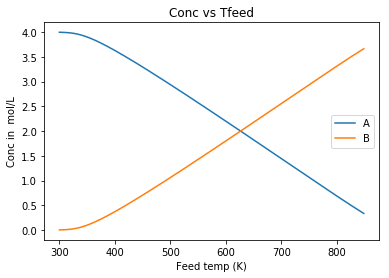

In [6]:
Ca=np.ones(550)
Cb=np.ones(550)
Treac=np.ones(550)
TFeed=range(300,850)
for i in range(300,850) :
    Tin = float(i)
    sol=fsolve(nonisothermal_CSTR,[2,2,Tin],args=(Tin,))
    Ca[i-300]=(sol[0])
    Cb[i-300]=(sol[1])
    Treac[i-300]=(sol[2])
    
import matplotlib.pyplot as plt
#print(Ca)
plt.plot(TFeed,Ca,TFeed,Cb) 
plt.xlabel("Feed temp (K)")
plt.ylabel("Conc in  mol/L")
plt.legend(['A','B'])
plt.title("Conc vs Tfeed")
plt.show()
